### Import Libraries

In [119]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression 
from sklearn.svm import SVC 
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.tree import plot_tree
import joblib

# Data Representation 

In [120]:
df = pd.read_csv('Churn_Modelling.csv')

In [121]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619.0,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608.0,Spain,NaN,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502.0,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699.0,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850.0,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [122]:
df.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9999,10000,15628319,Walker,792.0,France,Female,28,4,130142.79,1,1,0,38190.78,0
10000,51,15616550,Chidiebele,698.0,Germany,Male,44,10,116363.37,2,1,0,198059.16,0
10001,122,15580203,Kennedy,674.0,Spain,Male,39,6,120193.42,1,0,0,100130.95,0
10002,129,15575492,Kennedy,828.0,France,Female,41,7,0.00,2,1,0,171378.77,0
10003,401,15690452,Tung,605.0,France,Male,52,1,63349.75,1,1,0,108887.44,0


In [123]:
df.sample(7)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
5525,5526,15782993,Pan,624.0,France,Male,51,10,123401.43,2,1,1,127825.25,0
4326,4327,15764284,Torres,714.0,Spain,Male,27,3,0.00,3,1,1,129130.09,0
3129,3130,15694453,Walker,631.0,Germany,Male,37,9,131519.49,2,1,1,51752.18,0
9804,9805,15596136,Folliero,637.0,France,Female,36,9,166939.88,1,1,1,72504.76,0
1035,1036,15652955,Price,678.0,Spain,Male,30,0,0.00,1,1,0,35113.08,0
8328,8329,15687171,Birch,638.0,Spain,Male,34,5,146679.77,1,1,0,102179.86,0
8227,8228,15702434,Hsieh,850.0,France,Female,30,3,0.00,2,1,0,116692.80,0


In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10004 entries, 0 to 10003
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10004 non-null  int64  
 1   CustomerId       10004 non-null  int64  
 2   Surname          10004 non-null  object 
 3   CreditScore      9998 non-null   float64
 4   Geography        10004 non-null  object 
 5   Gender           10003 non-null  object 
 6   Age              10004 non-null  int64  
 7   Tenure           10004 non-null  int64  
 8   Balance          10004 non-null  float64
 9   NumOfProducts    10004 non-null  int64  
 10  HasCrCard        10004 non-null  int64  
 11  IsActiveMember   10004 non-null  int64  
 12  EstimatedSalary  10004 non-null  float64
 13  Exited           10004 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


In [125]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10004.000000,1.000400e+04,9998.000000,10004.000000,10004.000000,10004.000000,10004.000000,10004.000000,10004.000000,10004.000000,10004.000000
mean,4998.570872,1.569091e+07,650.609322,38.923830,5.013195,76485.285828,1.530188,0.705518,0.514894,100108.042296,0.203619
std,2887.931077,7.194342e+04,96.639950,10.486668,2.892389,62392.558080,0.581624,0.455832,0.499803,57511.817692,0.402709
min,1.000000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,2497.750000,1.562839e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.000000,0.000000,51014.837500,0.000000
50%,4998.500000,1.569071e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.000000,1.000000,100218.210000,0.000000
75%,7499.250000,1.575322e+07,718.000000,44.000000,7.000000,127639.372500,2.000000,1.000000,1.000000,149400.107500,0.000000
max,10000.000000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


# Data Cleaning

### clear null values

In [126]:
df.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        6
Geography          0
Gender             1
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [127]:
df['CreditScore'] = df['CreditScore'].fillna(df['CreditScore'].mean())

In [128]:
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])

In [129]:
df.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

### check duplicated values

In [130]:
df.duplicated().sum()

4

In [131]:
df = df.drop_duplicates()

In [132]:
df.duplicated().sum()

0

In [133]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

### Drop Columns

In [134]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  float64
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


In [135]:
df = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

In [136]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619.0,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608.0,Spain,Male,41,1,83807.86,1,0,1,112542.58,0
2,502.0,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699.0,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850.0,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# EDA

In [137]:
df['CreditScore'].describe()

count    10000.000000
mean       650.589066
std         96.611475
min        350.000000
25%        584.000000
50%        652.000000
75%        718.000000
max        850.000000
Name: CreditScore, dtype: float64

<Axes: >

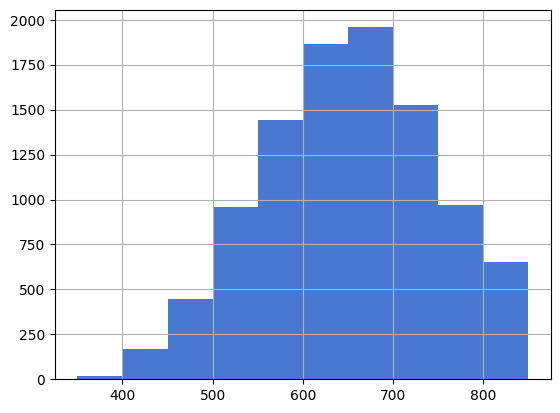

In [138]:
df['CreditScore'].hist()

In [139]:
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619.0,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608.0,Spain,Male,41,1,83807.86,1,0,1,112542.58,0
2,502.0,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699.0,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850.0,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771.0,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516.0,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709.0,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772.0,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


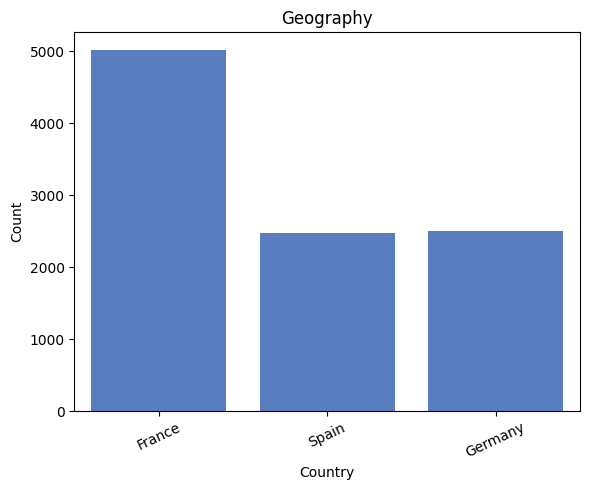

In [140]:
plt.figure(figsize=(6,5))
sns.set_palette("muted")  
sns.countplot(x='Geography', data=df)
plt.title("Geography")
plt.xlabel("Country")
plt.ylabel("Count")
plt.xticks(rotation=25)  
plt.tight_layout()
plt.show()

In [141]:
df['Geography'].value_counts(normalize=True) * 100

Geography
France     50.14
Germany    25.09
Spain      24.77
Name: proportion, dtype: float64

In [142]:
df['Gender'].value_counts()

Gender
Male      5458
Female    4542
Name: count, dtype: int64

In [143]:
df[df['Balance'] == 0]

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619.000000,France,Female,42,2,0.0,1,1,1,101348.88,1
3,699.000000,France,Female,39,1,0.0,2,0,0,93826.63,0
6,822.000000,France,Male,50,7,0.0,2,1,1,10062.80,0
11,650.609322,Spain,Male,24,3,0.0,2,1,0,76390.01,0
12,650.609322,France,Female,34,10,0.0,2,1,0,26260.98,0
...,...,...,...,...,...,...,...,...,...,...,...
9989,841.000000,Spain,Male,28,4,0.0,2,1,1,179436.60,0
9992,726.000000,Spain,Male,36,2,0.0,1,1,0,195192.40,0
9994,800.000000,France,Female,29,2,0.0,2,0,0,167773.55,0
9995,771.000000,France,Male,39,5,0.0,2,1,0,96270.64,0


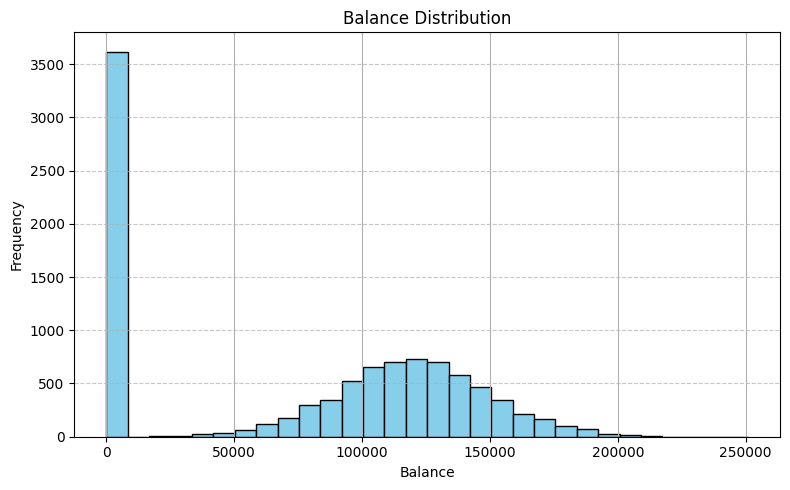

In [144]:
plt.figure(figsize=(8, 5))
df['Balance'].hist(bins=30, color='skyblue', edgecolor='black')
plt.title("Balance Distribution")
plt.xlabel("Balance")
plt.ylabel("Frequency")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


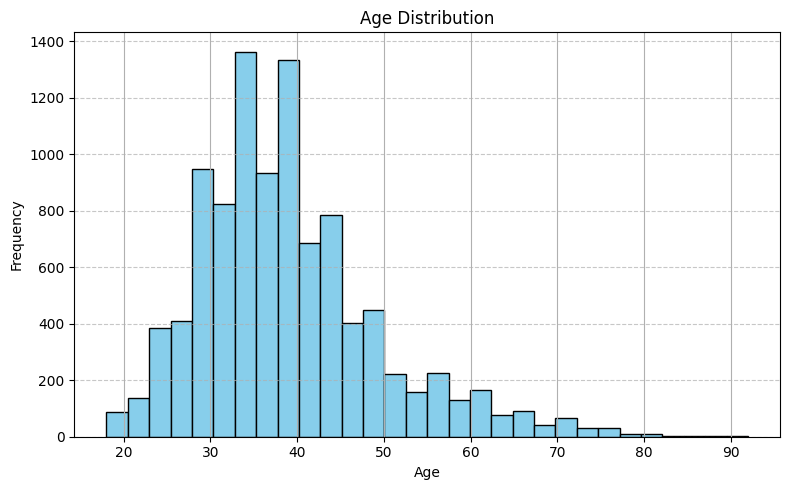

In [145]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
df['Age'].hist(bins=30, color='skyblue', edgecolor='black')
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [146]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619.0,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608.0,Spain,Male,41,1,83807.86,1,0,1,112542.58,0
2,502.0,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699.0,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850.0,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [147]:
df['IsActiveMember'].value_counts()

IsActiveMember
1    5151
0    4849
Name: count, dtype: int64

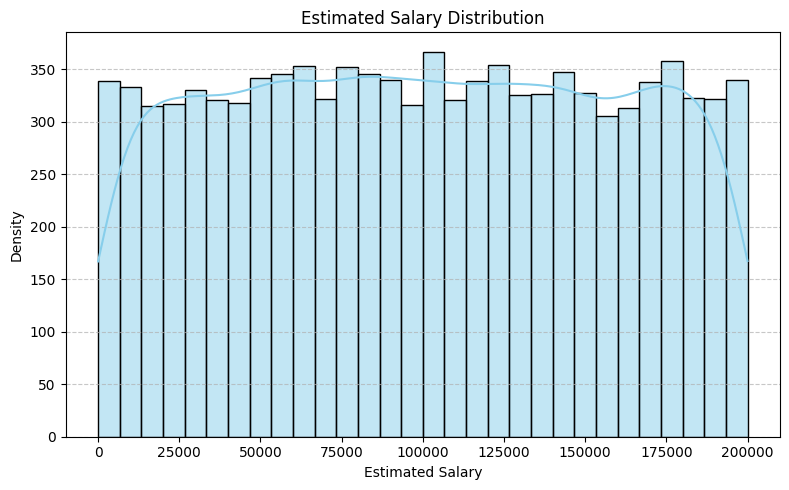

In [148]:
plt.figure(figsize=(8, 5))
sns.histplot(df['EstimatedSalary'], bins=30, kde=True, color='skyblue', edgecolor='black')
plt.title("Estimated Salary Distribution")
plt.xlabel("Estimated Salary")
plt.ylabel("Density")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Exited
0    7963
1    2037
Name: count, dtype: int64


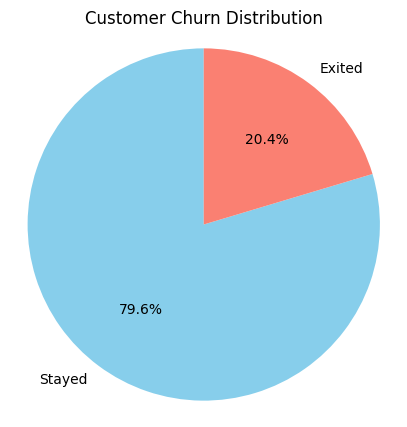

In [149]:
churn_counts = df['Exited'].value_counts()
print(churn_counts)
plt.figure(figsize=(5, 5))
plt.pie(churn_counts, labels=['Stayed', 'Exited'], autopct='%1.1f%%', colors=['skyblue', 'salmon'], startangle=90)
plt.title('Customer Churn Distribution')
plt.axis('equal')  # Make it a circle
plt.show()

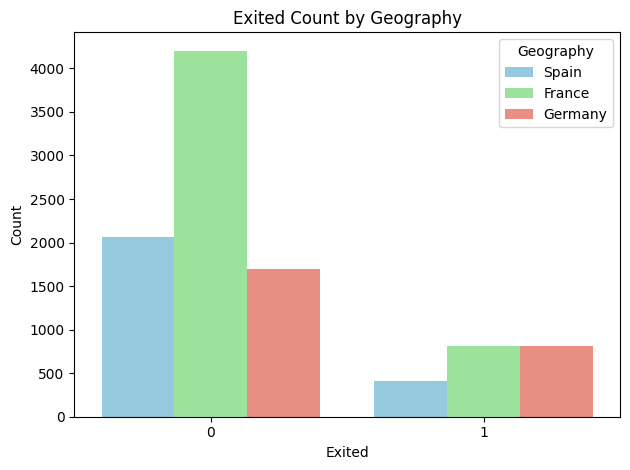

In [150]:
palette_colors = ['skyblue', 'lightgreen', 'salmon']  # Example for 3 categories

sns.countplot(x='Exited', hue='Geography', data=df, palette=palette_colors)
plt.title("Exited Count by Geography")
plt.xlabel("Exited")
plt.ylabel("Count")
plt.legend(title='Geography')
plt.tight_layout()
plt.show()

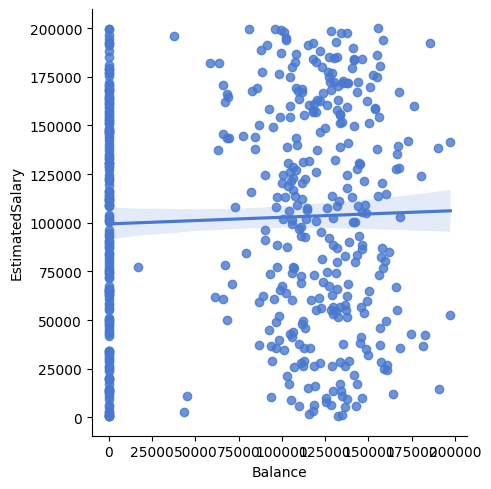

In [151]:
sns.lmplot(x='Balance' ,y='EstimatedSalary' , data=df.sample(500))

In [152]:
df.groupby(['Exited'])['IsActiveMember'].value_counts()

Exited  IsActiveMember
0       1                 4416
        0                 3547
1       0                 1302
        1                  735
Name: count, dtype: int64

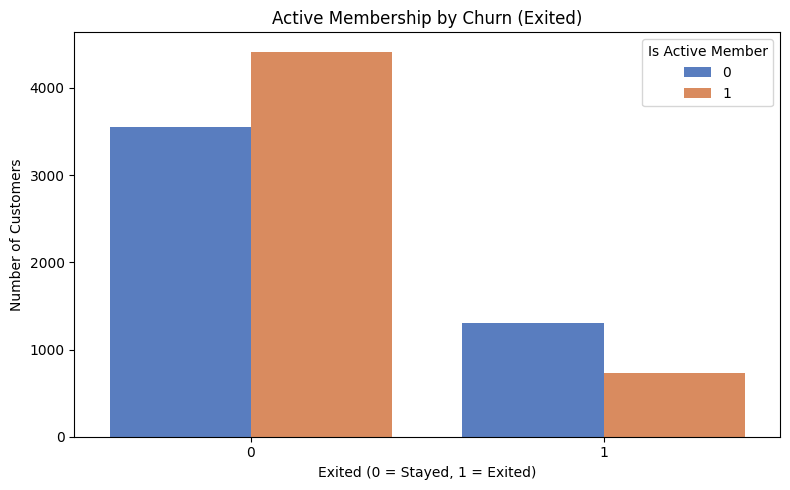

In [153]:
grouped = df.groupby(['Exited', 'IsActiveMember']).size().reset_index(name='Count')
plt.figure(figsize=(8, 5))
sns.barplot(data=grouped, x='Exited', y='Count', hue='IsActiveMember', palette='muted')
plt.title("Active Membership by Churn (Exited)")
plt.xlabel("Exited (0 = Stayed, 1 = Exited)")
plt.ylabel("Number of Customers")
plt.legend(title='Is Active Member')
plt.tight_layout()
plt.show()

In [154]:
x = df.drop('Exited' , axis=1)
y = df['Exited']

#### Encode Data

In [155]:
geography = LabelEncoder()
x['Geography'] = geography.fit_transform(x['Geography'])
gender = LabelEncoder()
x['Gender'] = gender.fit_transform(x['Gender'])

In [156]:
x.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619.0,0,0,42,2,0.00,1,1,1,101348.88
1,608.0,2,1,41,1,83807.86,1,0,1,112542.58
2,502.0,0,0,42,8,159660.80,3,1,0,113931.57
3,699.0,0,0,39,1,0.00,2,0,0,93826.63
4,850.0,2,0,43,2,125510.82,1,1,1,79084.10


#### Split data

In [157]:
xtrain , xtest ,ytrain , ytest = train_test_split(x,y , test_size=.2 , random_state=27) 

#### Normalize data

In [158]:
scaler = MinMaxScaler()
x_train_scaled = scaler.fit_transform(xtrain)
x_test_scaled  = scaler.transform(xtest) 

## Modeling

#### Logistic Regression

In [159]:
logistic_model = LogisticRegression()
logistic_model.fit(x_train_scaled , ytrain)

LogisticRegression()

In [160]:
y_predict = logistic_model.predict(x_test_scaled)
y_predict

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [161]:
print('Logistic regression accuracy : ',accuracy_score(ytest , y_predict))

Logistic regression accuracy :  0.809


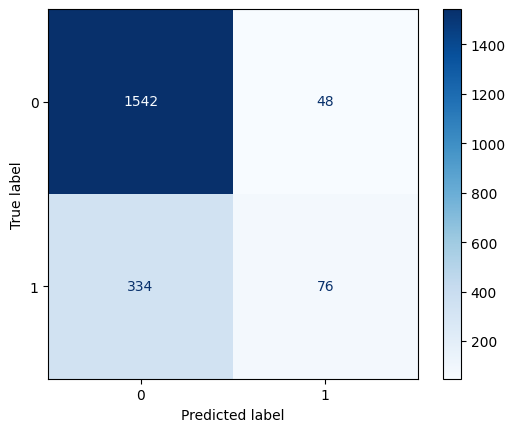

In [162]:
ConfusionMatrixDisplay.from_estimator(logistic_model, x_test_scaled, ytest, cmap='Blues')
plt.show()

#### SVM model

In [197]:
svc = SVC(kernel='rbf' ,C=2)
svc.fit(x_train_scaled , ytrain)

SVC(C=2)

In [198]:
y_predict = svc.predict(x_test_scaled)

In [199]:
print('svm accuracy : ' , accuracy_score(ytest , y_predict))

svm accuracy :  0.862


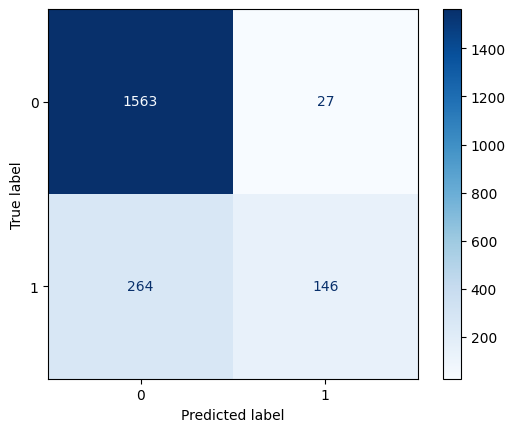

In [166]:
ConfusionMatrixDisplay.from_estimator(svc , x_test_scaled , ytest , cmap='Blues')

#### Random forest model 

In [167]:
random_forest_model = RandomForestClassifier(n_estimators=120)
random_forest_model.fit(x_train_scaled , ytrain)


RandomForestClassifier(n_estimators=120)

In [168]:
y_predict = random_forest_model.predict(x_test_scaled)

In [169]:
print('svm accuracy : ' , accuracy_score(ytest , y_predict))

svm accuracy :  0.8645


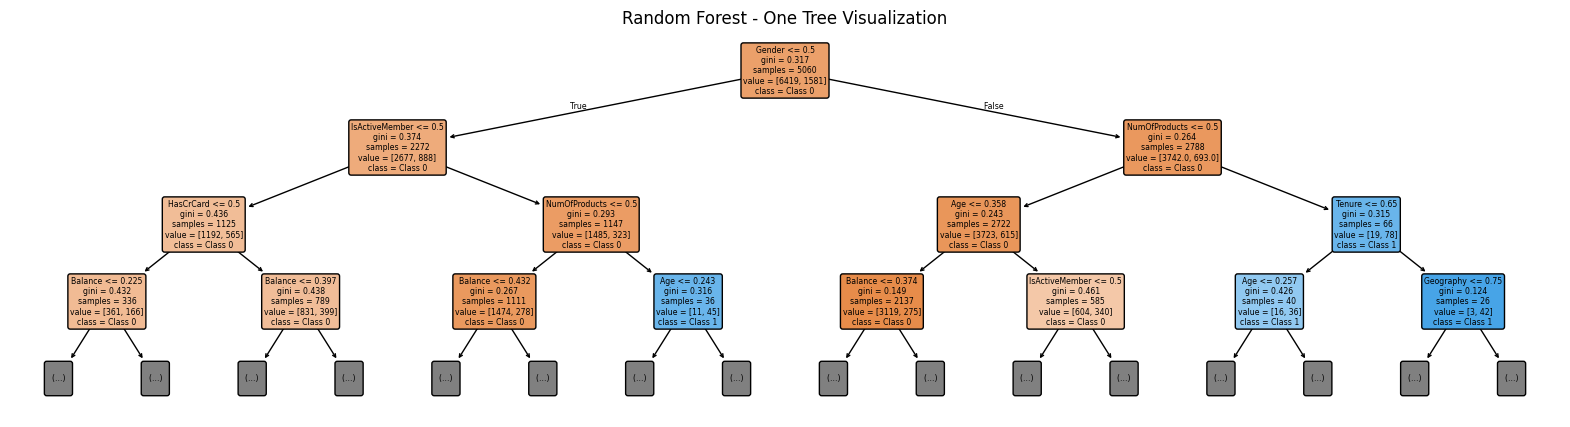

In [170]:
plt.figure(figsize=(20, 5))
plot_tree(random_forest_model.estimators_[0], 
          feature_names=xtrain.columns, 
          class_names=["Class 0", "Class 1"],
          filled=True, 
          rounded=True, 
          max_depth=3)  # لو عايز الشجرة تكون أوضح
plt.title("Random Forest - One Tree Visualization")
plt.show()


## save random forest model

In [200]:
joblib.dump(random_forest_model, 'rf_churn_prediction86_v1.pkl')

['rf_churn_prediction86_v1.pkl']